In [1]:
import opendatasets as od 
import numpy as np
from sklearn.manifold import TSNE 
from scipy.spatial.distance import cdist

# od.download( 
# 	"https://www.kaggle.com/datasets/kingabzpro/cosmetics-datasets") 


In [2]:
import pandas as pd

# reading the XLSX file 
file =('./data/cosmetics.csv') 
skincare = pd.read_csv(file)

# displaying the contents of the XLSX file 
skincare.head() 


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [3]:
skincare.duplicated().sum()

0

In [4]:
column = ['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
skincare[column].describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [5]:
skincare.shape

(1472, 11)

In [ ]:
#Focus on one product category and one skin type

In [10]:
## Filter for Moisturizer
moisturizers = skincare[skincare['Label'] == 'Moisturizer']
## Filter for cleanser 
cleansers = skincare[skincare['Label'] == 'Cleanser']
##Filter for dry skin 
moisturizers_subset = moisturizers[moisturizers['Oily'] == 1]

# Reset index
moisturizers_subset = moisturizers_subset.reset_index(drop=True)


In [11]:
cleansers.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
298,Cleanser,DRUNK ELEPHANT,T.L.C. Sukari Babyfacial™,80,4.5,"Water, Glycolic Acid, Hydroxyethyl Acrylate/So...",1,1,1,1,0
299,Cleanser,DRUNK ELEPHANT,T.L.C. Framboos™ Glycolic Night Serum,90,4.3,"Water, Glycolic Acid, Butylene Glycol, Glyceri...",1,1,1,1,0
300,Cleanser,FRESH,Soy Face Cleanser,38,4.4,"Water, Coco-Glucoside, Glycerin, Butylene Glyc...",0,0,0,0,0
301,Cleanser,FARMACY,Green Clean Makeup Meltaway Cleansing Balm wit...,34,4.6,"Cetyl Ethylhexanoate, Caprylic/Capric Triglyce...",1,1,1,1,1
302,Cleanser,PHILOSOPHY,Purity Made Simple Cleanser,24,4.5,"Water, Sodium Lauroamphoacetate, Sodium Tridec...",1,1,1,1,1


In [ ]:
#Tokenizing the ingredients

In [12]:
ingredient_idx = {}
corpus = []
idx = 0

# For loop for tokenization
for i in range(len(moisturizers_subset)):    
    ingredients = moisturizers_subset['Ingredients'][i]
    ingredients_lower = ingredients.lower()
    tokens = ingredients_lower.split(', ')
    corpus.append(tokens)
    for ingredient in tokens:
        if ingredient not in ingredient_idx:
            ingredient_idx[ingredient] = idx
            idx += 1
            
# Check the result 
print("The index for decyl oleate is", ingredient_idx['decyl oleate'])

The index for decyl oleate is 25


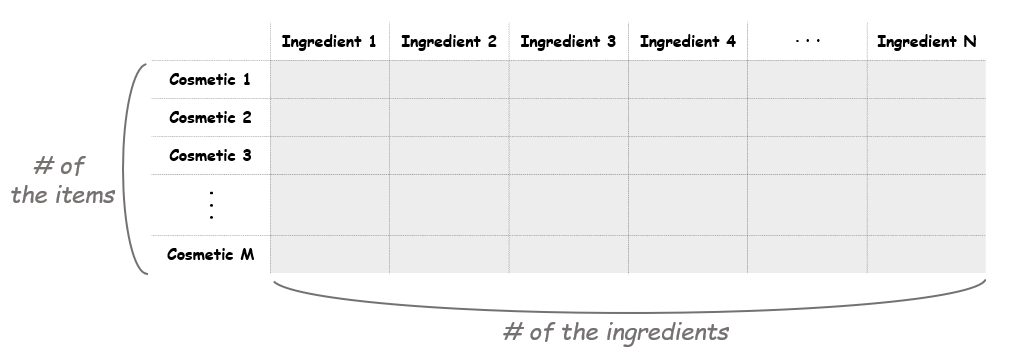

In [15]:
from IPython.display import Image
from PIL import Image


path="./images/image_1.jpg"
display(Image.open(path))

In [16]:
# Get the number of items and tokens 
M = len(moisturizers_subset)
N = len(ingredient_idx)

# Initialize a matrix of zeros
A = np.zeros((M,N))

In [17]:
A.shape

(179, 2151)

In [ ]:
# Creating a counter function

In [18]:
# Define the oh_encoder function
def oh_encoder(tokens):
    x = np.zeros(N)
    for ingredient in tokens:
        # Get the index for each ingredient
        idx = ingredient_idx[ingredient]
        # Put 1 at the corresponding indices
        x[idx] = 1
    return x

In [20]:
# The cosmetic-Ingredient matrix

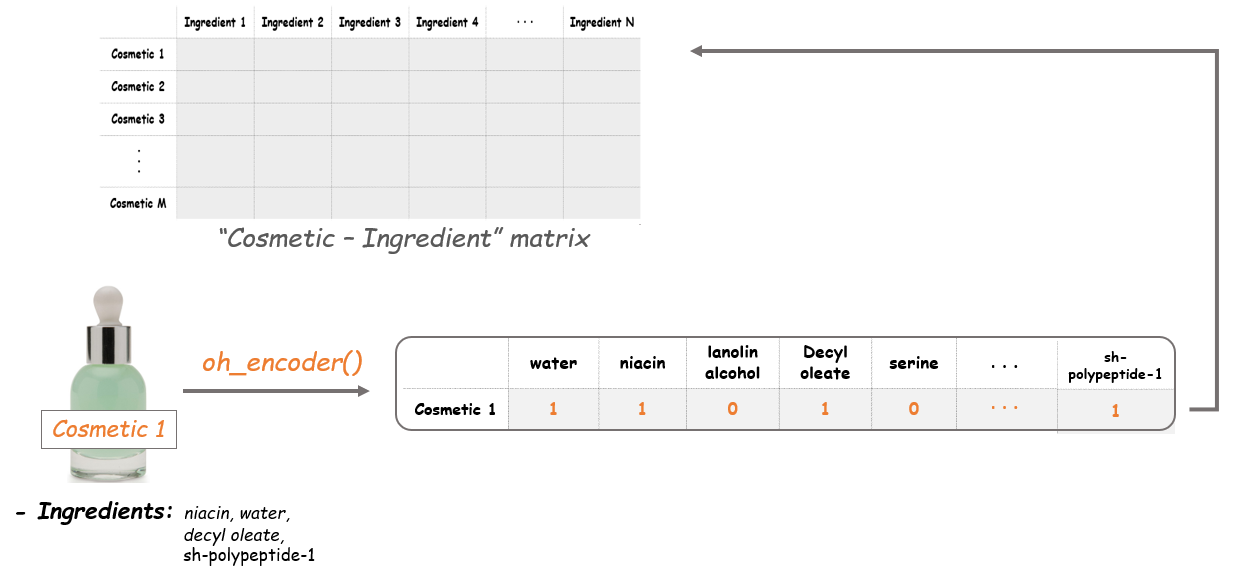

In [19]:
path="./images/image_2.jpg"
display(Image.open(path))

In [21]:
# Make a document-term matrix
i = 0
for tokens in corpus:
    A[i, :] = oh_encoder(tokens)
    i +=1

In [22]:
A.shape

(179, 2151)

In [ ]:
A

In [23]:
# Dimension reduction with t-SNE
model = TSNE(n_components = 2, learning_rate = 200, random_state = 42)
tsne_features = model.fit_transform(A)

# Make X, Y columns 
moisturizers_subset['X'] = tsne_features[:, 0]
moisturizers_subset['Y'] = tsne_features[:, 1]

In [24]:
moisturizers_subset.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,52.340782,-435.526093
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,-3.670455,-139.865601
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,46.442646,-165.030380
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,67.871986,417.562988
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,-356.553894,234.892288


In [ ]:
#Find Similar products

In [25]:
target = moisturizers_subset[moisturizers_subset['Name'] == 'The Moisturizing Soft Cream']
target

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,67.871986,417.562988


In [26]:
x  = target['X'].values[0]
y = target['Y'].values[0]
print(x, y)

67.87199 417.563


In [27]:
df1 = pd.DataFrame()
df1['point'] = [(x, y) for x,y in zip(moisturizers_subset['X'], moisturizers_subset['Y'])]

df1.head()

,point
0,"(52.340782165527344, -435.5260925292969)"
1,"(-3.6704554557800293, -139.8656005859375)"
2,"(46.44264602661133, -165.03038024902344)"
3,"(67.87198638916016, 417.56298828125)"
4,"(-356.55389404296875, 234.8922882080078)"


In [28]:
point = np.array([[x,y]])

point.shape

(1, 2)

In [29]:
cdist(point, np.array([[-9.456123352050781, 16.348276138305664]]), metric='euclidean')

array([[408.59868061]])

In [30]:
moisturizers_subset['distance'] = [cdist(np.array([[x,y]]), np.array([product]), metric='euclidean') for product in df1['point']]

In [31]:
moisturizers_subset.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,distance
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,52.340782,-435.526093,[[853.2304484152098]]
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,-3.670455,-139.865601,[[562.0008475719593]]
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,46.442646,-165.030380,[[582.9873495058233]]
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,67.871986,417.562988,[[0.0]]
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,-356.553894,234.892288,[[462.06700016971155]]


In [32]:
# arrange by descending order
top_matches = moisturizers_subset.sort_values(by=['distance'])
top_matches.head(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,distance
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,67.871986,417.562988,[[0.0]]
105,Moisturizer,LA MER,The Moisturizing Soft Lotion,270,3.6,"Algae (Seaweed) Extract, Petrolatum, Isocetyl ...",1,1,1,1,1,49.645355,402.614899,[[23.572345370932517]]
65,Moisturizer,PERRICONE MD,Cold Plasma Sub-D Firming Neck Treatment,135,3.8,"Water, Glycolic Acid, L-Tyrosine, Dimethyl MEA...",1,1,1,1,1,37.617443,316.996826,[[105.01852385160215]]
113,Moisturizer,LA MER,The Renewal Oil Mini,130,4.0,"Limnanthes Alba (Meadowfoam) Seed Oil, Dimethi...",1,1,1,1,1,-38.083920,420.267731,[[105.99042234911096]]
34,Moisturizer,LA MER,The Renewal Oil,245,4.2,"Limnanthes Alba (Meadowfoam) Seed Oil, Dimethi...",1,1,1,1,1,-38.083920,420.267731,[[105.99042234911096]]


In [33]:
top_matches = top_matches[['Label', 'Brand', 'Name', 'Price', 'Ingredients', 'distance']]
top_matches = top_matches.reset_index()
top_matches = top_matches.drop(top_matches.index[0])
top_matches.head()

,index,Label,Brand,Name,Price,Ingredients,distance
1,105,Moisturizer,LA MER,The Moisturizing Soft Lotion,270,"Algae (Seaweed) Extract, Petrolatum, Isocetyl ...",[[23.572345370932517]]
2,65,Moisturizer,PERRICONE MD,Cold Plasma Sub-D Firming Neck Treatment,135,"Water, Glycolic Acid, L-Tyrosine, Dimethyl MEA...",[[105.01852385160215]]
3,113,Moisturizer,LA MER,The Renewal Oil Mini,130,"Limnanthes Alba (Meadowfoam) Seed Oil, Dimethi...",[[105.99042234911096]]
4,34,Moisturizer,LA MER,The Renewal Oil,245,"Limnanthes Alba (Meadowfoam) Seed Oil, Dimethi...",[[105.99042234911096]]
5,91,Moisturizer,KORA ORGANICS,Noni Glow Face Oil,68,"Rosa Canina Fruit Oil*, Simmondsia Chinensis (...",[[107.90714490022542]]


In [34]:
cosmetic_1 = moisturizers_subset[moisturizers_subset['Name'] == "The Moisturizing Soft Cream"]
cosmetic_2 = moisturizers_subset[moisturizers_subset['Name'] == "Moisture Surge Hydrating Supercharged Concentrate"]

In [35]:
# Display each item's data and ingredients
display(cosmetic_1)
print(cosmetic_1.Ingredients.values)
display(cosmetic_2)
print(cosmetic_2.Ingredients.values)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,distance
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,67.871986,417.562988,[[0.0]]


['Algae (Seaweed) Extract, Cyclopentasiloxane, Petrolatum, Glyceryl Distearate, Phenyl Trimethicone, Butylene Glycol, Hydrogenated Vegetable Oil, Cholesterol, Butyrospermum Parkii (Shea Butter), Steareth-10, Dimethicone, Glyceryl Stearate Se, Polysilicone-11, Sesamum Indicum (Sesame) Seed Oil, Medicago Sativa (Alfalfa) Seed Powder, Helianthus Annuus (Sunflower) Seedcake, Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal, Eucalyptus Globulus (Eucalyptus) Leaf Oil, Sodium Gluconate, Copper Gluconate, Calcium Gluconate, Magnesium Gluconate, Zinc Gluconate, Tocopheryl Succinate, Niacin, Sesamum Indicum (Sesame) Seed Powder, Water, Citrus Aurantifolia (Lime) Peel Extract, Laminaria Digitata Extract, Crithmum Maritimum Extract, Salicornia Herbacea Extract, Plankton Extract, Chlorella Vulgaris Extract, Glycine Soja (Soybean) Seed Extract, Glycerin, Caffeine, Sea Salt/Maris Sal/Sel Marin, Micrococcus Lysate, Diethylhexyl Succinate, Adenosine Phosphate, Creatine, Hydrolyzed Algin, Isocetyl Stear

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,distance
130,Moisturizer,CLINIQUE,Moisture Surge Hydrating Supercharged Concentrate,39,4.0,"Water , Glycerin , Butylene Glycol , Phenyl Tr...",1,1,1,1,1,237.823486,-295.828949,[[733.3563720819312]]


['Water , Glycerin , Butylene Glycol , Phenyl Trimethicone , Propanediol , Sucrose , Hydroxyethyl Urea , Alteromonas Ferment Extract , Hydrolyzed Rice Extract , Acetyl Glucosamine , Trehalose , Algae Extract , Caffeine , Cholesterol , Aloe Barbadensis Leaf Water , Sodium Hyaluronate , Pentaerythrityl Tetraethylhexanoate , Dextrin Palmitate , Acrylates/C10-30 Alkyl Acrylate Crosspolymer , Sorbitol , Sodium Polyaspartate , Tocopheryl Acetate , Carbomer , Dehydroxanthan Gum , Citric Acid , Tetrahexyldecyl Ascorbate , Benzophenone-4 , Pentaerythrityl Tetra-Di-T-Butyl Hydroxyhydrocinnamate , Sodium Hydroxide , Sodium Citrate , Disodium Edta , Bht , Chlorphenesin , Phenoxyethanol , Red 4 (Ci 14700) , Yellow 5 (Ci 19140)']


In [36]:
c1 = cosmetic_1.Ingredients.values
c2 = cosmetic_2.Ingredients.values

In [37]:
# make list of ingredients
c1_list = c1[0].split(",")
c2_list = c2[0].split(",")

# strip spaces
c1_list = [x.strip(' ') for x in c1_list]
c2_list = [x.strip(' ') for x in c2_list]

In [38]:
# turn lists into sets for comparison
c1_set = set(c1_list)
c2_set = set(c2_list)

In [39]:
same_ingredients = c2_set.intersection(c1_set)
print(same_ingredients)

{'Sodium Hyaluronate', 'Caffeine', 'Sucrose', 'Bht', 'Trehalose', 'Tocopheryl Acetate', 'Water', 'Butylene Glycol', 'Glycerin', 'Phenyl Trimethicone', 'Cholesterol', 'Disodium Edta', 'Phenoxyethanol', 'Tetrahexyldecyl Ascorbate'}


In [40]:
top_matches['Ingredients in common'] = [c1_set.intersection( set([x.strip(' ')for x in product.split(",")]) ) for product in top_matches['Ingredients']]
top_matches.head(5)

,index,Label,Brand,Name,Price,Ingredients,distance,Ingredients in common
1,105,Moisturizer,LA MER,The Moisturizing Soft Lotion,270,"Algae (Seaweed) Extract, Petrolatum, Isocetyl ...",[[23.572345370932517]],"{Cyclopentasiloxane, Glucose, Tocopheryl Aceta..."
2,65,Moisturizer,PERRICONE MD,Cold Plasma Sub-D Firming Neck Treatment,135,"Water, Glycolic Acid, L-Tyrosine, Dimethyl MEA...",[[105.01852385160215]],"{Sodium Hyaluronate, Zinc Gluconate, Caffeine,..."
3,113,Moisturizer,LA MER,The Renewal Oil Mini,130,"Limnanthes Alba (Meadowfoam) Seed Oil, Dimethi...",[[105.99042234911096]],"{Tocopheryl Acetate, Calcium Gluconate, Water,..."
4,34,Moisturizer,LA MER,The Renewal Oil,245,"Limnanthes Alba (Meadowfoam) Seed Oil, Dimethi...",[[105.99042234911096]],"{Tocopheryl Acetate, Calcium Gluconate, Water,..."
5,91,Moisturizer,KORA ORGANICS,Noni Glow Face Oil,68,"Rosa Canina Fruit Oil*, Simmondsia Chinensis (...",[[107.90714490022542]],{}


#Map the items with Bokeh

In [43]:
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()

# Make a source and a scatter plot  
source = ColumnDataSource(moisturizers_subset)
plot = figure(x_axis_label = 'T-SNE 1', 
              y_axis_label = 'T-SNE 2', 
              width = 500, height = 400)
plot.circle(x = 'X', 
    y = 'Y', 
    source = source, 
    size = 10, color = '#FF7373', alpha = .8)

Loading BokehJS ...

GlyphRenderer(id='p1044', ...)

#Adding a hover tool

In [44]:
# Create a HoverTool object
hover = HoverTool(tooltips = [('Item', '@Name'),
                              ('Brand', '@Brand'),
                              ('Price', '$@Price'),
                              ('Rank', '@Rank')])
plot.add_tools(hover)

In [45]:
# Plot the map
show(plot)

Compare two product

In [46]:
# Print the ingredients of two similar cosmetics
cosmetic_1 = moisturizers_subset[moisturizers_subset['Name'] == "Color Control Cushion Compact Broad Spectrum SPF 50+"]
cosmetic_2 = moisturizers_subset[moisturizers_subset['Name'] == "BB Cushion Hydra Radiance SPF 50"]

# Display each item's data and ingredients
display(cosmetic_1)
print(cosmetic_1.Ingredients.values)
display(cosmetic_2)
print(cosmetic_2.Ingredients.values)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,distance
40,Moisturizer,AMOREPACIFIC,Color Control Cushion Compact Broad Spectrum S...,60,4.0,"Phyllostachis Bambusoides Juice, Cyclopentasil...",1,1,1,1,1,141.986145,-258.217865,[[679.8328251547018]]


['Phyllostachis Bambusoides Juice, Cyclopentasiloxane, Cyclohexasiloxane, Peg-10 Dimethicone, Phenyl Trimethicone, Butylene Glycol, Butylene Glycol Dicaprylate/Dicaprate, Alcohol, Arbutin, Lauryl Peg-9 Polydimethylsiloxyethyl Dimethicone, Acrylates/Ethylhexyl Acrylate/Dimethicone Methacrylate Copolymer, Polyhydroxystearic Acid, Sodium Chloride, Polymethyl Methacrylate, Aluminium Hydroxide, Stearic Acid, Disteardimonium Hectorite, Triethoxycaprylylsilane, Ethylhexyl Palmitate, Lecithin, Isostearic Acid, Isopropyl Palmitate, Phenoxyethanol, Polyglyceryl-3 Polyricinoleate, Acrylates/Stearyl Acrylate/Dimethicone Methacrylate Copolymer, Dimethicone, Disodium Edta, Trimethylsiloxysilicate, Ethylhexyglycerin, Dimethicone/Vinyl Dimethicone Crosspolymer, Water, Silica, Camellia Japonica Seed Oil, Camillia Sinensis Leaf Extract, Caprylyl Glycol, 1,2-Hexanediol, Fragrance, Titanium Dioxide, Iron Oxides (Ci 77492, Ci 77491, Ci77499).']


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y,distance
49,Moisturizer,LANEIGE,BB Cushion Hydra Radiance SPF 50,38,4.3,"Water, Cyclopentasiloxane, Zinc Oxide (CI 7794...",1,1,1,1,1,155.429199,-289.514435,[[712.477892829066]]


['Water, Cyclopentasiloxane, Zinc Oxide (CI 77947), Ethylhexyl Methoxycinnamate, PEG-10 Dimethicone, Cyclohexasiloxane, Phenyl Trimethicone, Iron Oxides (CI 77492), Butylene Glycol Dicaprylate/Dicaprate, Niacinamide, Lauryl PEG-9 Polydimethylsiloxyethyl Dimethicone, Acrylates/Ethylhexyl Acrylate/Dimethicone Methacrylate Copolymer, Titanium Dioxide (CI 77891 , Iron Oxides (CI 77491), Butylene Glycol, Sodium Chloride, Iron Oxides (CI 77499), Aluminum Hydroxide, HDI/Trimethylol Hexyllactone Crosspolymer, Stearic Acid, Methyl Methacrylate Crosspolymer, Triethoxycaprylylsilane, Phenoxyethanol, Fragrance, Disteardimonium Hectorite, Caprylyl Glycol, Yeast Extract, Acrylates/Stearyl Acrylate/Dimethicone Methacrylate Copolymer, Dimethicone, Trimethylsiloxysilicate, Polysorbate 80, Disodium EDTA, Hydrogenated Lecithin, Dimethicone/Vinyl Dimethicone Crosspolymer, Mica (CI 77019), Silica, 1,2-Hexanediol, Polypropylsilsesquioxane, Chenopodium Quinoa Seed Extract, Magnesium Sulfate, Calcium Chloride